## Melbourne Housing Market Prices Prediction - Kaggle

### Dataset Link -  https://www.kaggle.com/anthonypino/melbourne-housing-market

This data was scraped from publicly available results posted every week from Domain.com.au, I've cleaned it as best I can, now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

….Now with extra data including including property size, land size and council area, you may need to change your code!

Some Key Details
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

### Importing Libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_absolute_error

### Importing Dataset

In [2]:
df=pd.read_csv('melbourne.csv')

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


### Exploratory Data Analysis

In [5]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [6]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


### Checking the number of unique values

In [7]:
df.nunique()

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
dtype: int64

<AxesSubplot:xlabel='Regionname', ylabel='Car'>

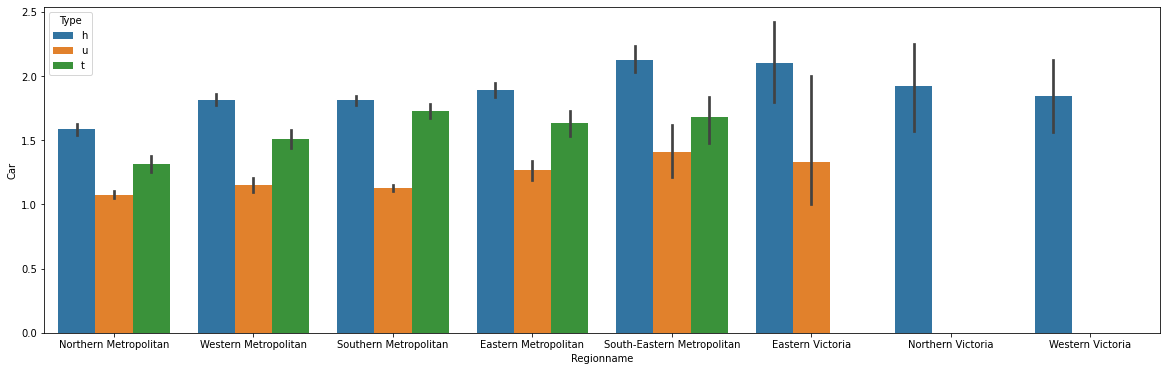

In [8]:
plt.figure(figsize=(20,6))
sns.barplot(x='Regionname',y="Car",hue="Type",data=df)

#### There are no Units in Northen Victoria and Western Victoria, whereas no Townhouses in Eastern, Northern and Western Victoria respectively

In [9]:
df['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

### Chekcing the missing values

<AxesSubplot:>

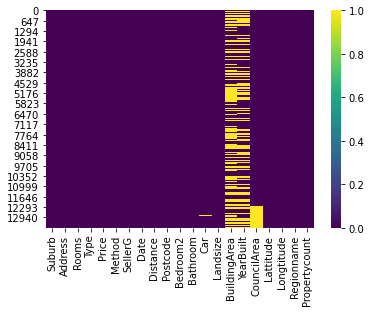

In [10]:
sns.heatmap(df.isnull(),cmap='viridis')

### Filling out the missing values for the Car Spaces

In [11]:
def car_spaces(jagah):
    Car=jagah[0]
    Regionname= jagah[1]
    Type= jagah[2]    
    
    # Condn 1:
    
    if Regionname=="Northern Metropolitan" and Type=='h':
        return Car==2
    elif Regionname=="Northern Metropolitan" and Type=='u':
        return Car==1
    elif Regionname=="Northern Metropolitan" and Type=='t':
        return Car==1
    
    # Condn 2:
    
    elif Regionname=="Western Metropolitan" and Type=='h':
        return Car==2
    elif Regionname=="Western Metropolitan" and Type=='u':
        return Car==1
    elif Regionname=="Western Metropolitan" and Type=='t':
        return Car==1
    
    # Condn 3:
    
    elif Regionname=="Southern Metropolitan" and Type=='h':
        return Car==2
    elif Regionname=="Southern Metropolitan" and Type=='u':
        return Car==1
    elif Regionname=="Southern Metropolitan" and Type=='t':
        return Car==2
    
    # Condn 4:
    
    elif Regionname=="Eastern Metropolitan" and Type=='h':
        return Car==2
    elif Regionname=="Eastern Metropolitan" and Type=='u':
        return Car==1
    elif Regionname=="Eastern Metropolitan" and Type=='t':
        return Car==2
    
    # Condn 5:
    
    elif Regionname=="South-Eastern Metropolitan" and Type=='h':
        return Car==2
    elif Regionname=="South-Eastern Metropolitan" and Type=='u':
        return Car==1
    elif Regionname=="South-Eastern Metropolitan" and Type=='t':
        return Car==2
    # Condn 6:
    
    elif Regionname=="Eastern Victoria" and Type=='h':
        return Car==2
    elif Regionname=="Eastern Victoria" and Type=='u':
        return Car==1
    
    # Condn 7:
    
    elif Regionname=="Northern Victoria" and Type=='h':
        return Car==2
    elif Regionname=="Northern Victoria" and Type=='u':
        return Car==1
   
    
    # Condn 8:
    
    elif Regionname=="Western Victoria" and Type=='h':
        return Car==2
    elif Regionname=="Western Victoria" and Type=='u':
        return Car==1
    
    # Condn 9:
    
    else:
        return Car   

In [12]:
df["Car"]=df[["Car","Regionname",'Type']].apply(car_spaces,axis=1)

### Remaining Missing values

<AxesSubplot:>

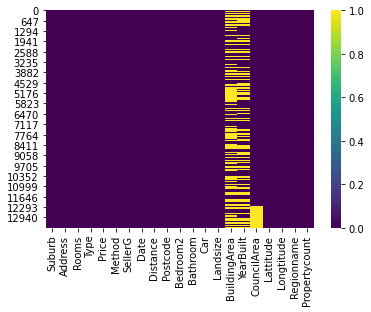

In [13]:
sns.heatmap(df.isnull(),cmap='viridis')

In [14]:
df['CouncilArea'].unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', nan, 'Knox',
       'Maroondah', 'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik',
       'Whittlesea', 'Frankston', 'Macedon Ranges', 'Yarra Ranges',
       'Wyndham', 'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

#### Visualising the Mean distance of every CouncilArea from the Centre of the City so as to impute the missing values in the CouncilArea Column

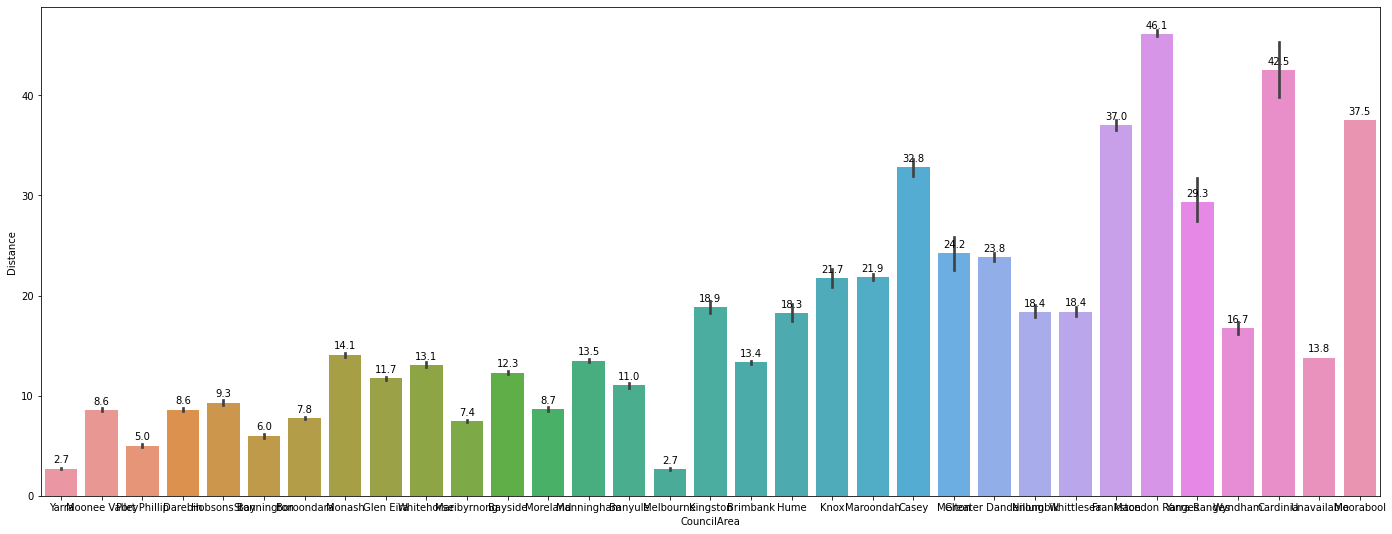

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(24,9))
splot=sns.barplot(x='CouncilArea',y="Distance",data=df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
     


In [16]:
df.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13580
Landsize         13580
BuildingArea      7130
YearBuilt         8205
CouncilArea      12211
Lattitude        13580
Longtitude       13580
Regionname       13580
Propertycount    13580
dtype: int64

In [17]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

### Dropping the features BuildingArea and YearBuilt as the number of missing values in those features is more and thus to impute them the Data is not sufficient

In [18]:
df1=df.drop(['BuildingArea'],axis=1)

In [19]:
df1.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [20]:
df1=df1.drop(['YearBuilt'],axis=1)

In [21]:
df1.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount'],
      dtype='object')

In [22]:
df1.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [23]:
df1.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,-0.018109,0.025678,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,-0.073448,0.037507,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.076325,0.025004,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.074023,0.024558,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,-0.011731,0.025646,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.076794,0.037130,-0.070594,0.118971,-0.052201
Car,-0.018109,-0.073448,0.076325,0.074023,-0.011731,0.076794,1.000000,-0.006810,-0.049996,0.084449,0.020013
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,-0.006810,1.000000,0.009695,0.010833,-0.006854
Lattitude,0.015948,-0.212934,-0.130723,-0.406104,0.015925,-0.070594,-0.049996,0.009695,1.000000,-0.357634,0.047086
Longtitude,0.100771,0.203656,0.239425,0.445357,0.102238,0.118971,0.084449,0.010833,-0.357634,1.000000,0.065988


In [24]:
df1.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

#### Exploring the data for the Feature CouncilArea to check if the missing values can be imputed or not. 

<AxesSubplot:xlabel='CouncilArea', ylabel='Distance'>

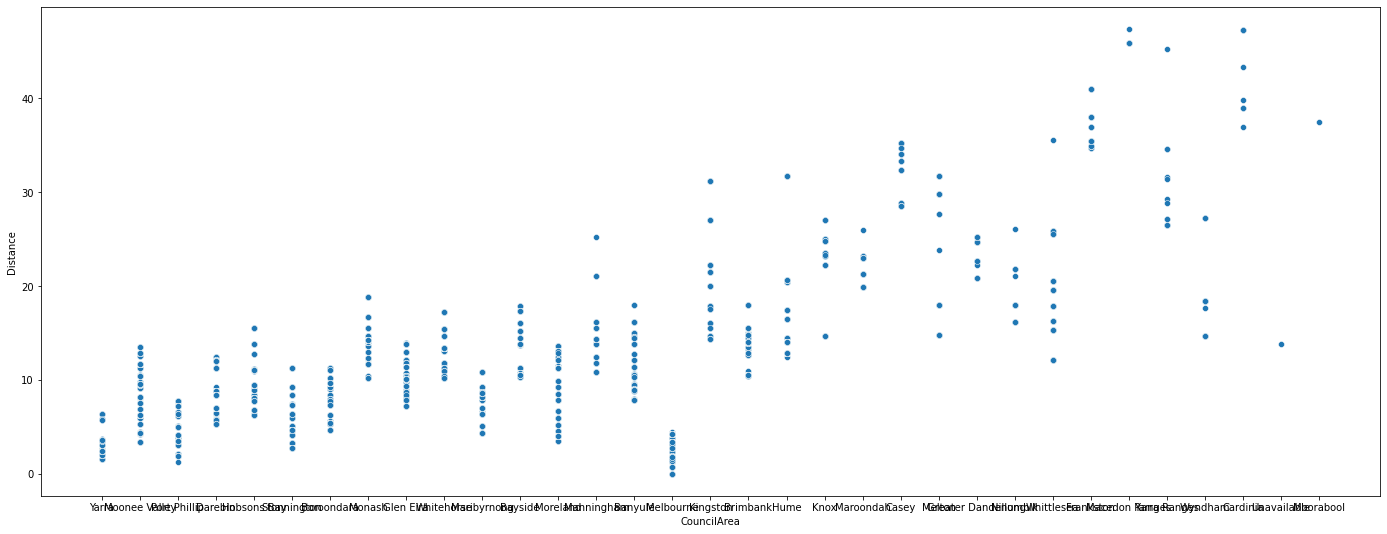

In [25]:
plt.figure(figsize=(24,9))
sns.scatterplot(x='CouncilArea', y='Distance',data=df1)

In [26]:
df1.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [27]:
df1['CouncilArea'].describe()

count        12211
unique          33
top       Moreland
freq          1163
Name: CouncilArea, dtype: object

In [28]:
df1['CouncilArea'].value_counts()

Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Maroondah              80
Knox                   80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Unavailable             1
Moorabool               1
Name: CouncilArea, dtype: int64

#### The data in the feature is in-conclusive so as to impute the missing values, dropping the feature and some more irrelevant features

In [29]:
del df1['CouncilArea']

In [30]:
del df1['Date']

In [31]:
del df1['Address']
del df1['SellerG']


### Generating dummies for the DataFrame and further creating a DataFrame ready for training the model.

In [32]:
df1=pd.get_dummies(df1)

In [33]:
df2=pd.get_dummies(df1['Car'])

In [34]:
df2=pd.concat([df1,df2],axis=1)

In [35]:
df2.columns

Index([                                'Rooms',
                                       'Price',
                                    'Distance',
                                    'Postcode',
                                    'Bedroom2',
                                    'Bathroom',
                                         'Car',
                                    'Landsize',
                                   'Lattitude',
                                  'Longtitude',
       ...
             'Regionname_Eastern Metropolitan',
                 'Regionname_Eastern Victoria',
            'Regionname_Northern Metropolitan',
                'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
            'Regionname_Southern Metropolitan',
             'Regionname_Western Metropolitan',
                 'Regionname_Western Victoria',
                                         False,
                                          True],
      dtype='object', length

In [36]:
df2

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,...,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,False,True
0,2,1480000.0,2.5,3067.0,2.0,1.0,False,202.0,-37.79960,144.99840,...,0,0,1,0,0,0,0,0,1,0
1,2,1035000.0,2.5,3067.0,2.0,1.0,False,156.0,-37.80790,144.99340,...,0,0,1,0,0,0,0,0,1,0
2,3,1465000.0,2.5,3067.0,3.0,2.0,False,134.0,-37.80930,144.99440,...,0,0,1,0,0,0,0,0,1,0
3,3,850000.0,2.5,3067.0,3.0,2.0,False,94.0,-37.79690,144.99690,...,0,0,1,0,0,0,0,0,1,0
4,4,1600000.0,2.5,3067.0,3.0,1.0,True,120.0,-37.80720,144.99410,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,3150.0,4.0,2.0,True,652.0,-37.90562,145.16761,...,0,0,0,0,1,0,0,0,0,1
13576,3,1031000.0,6.8,3016.0,3.0,2.0,True,333.0,-37.85927,144.87904,...,0,0,0,0,0,0,1,0,0,1
13577,3,1170000.0,6.8,3016.0,3.0,2.0,False,436.0,-37.85274,144.88738,...,0,0,0,0,0,0,1,0,1,0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,False,866.0,-37.85908,144.89299,...,0,0,0,0,0,0,1,0,1,0


In [37]:
del df2['Lattitude']
del df2['Longtitude']


In [38]:
df3=pd.get_dummies(df2['Bathroom'])

In [39]:
df2=pd.concat([df2,df3],axis=1)

In [40]:
df4=pd.get_dummies(df2['Bedroom2'])

In [41]:
df2=pd.concat([df2,df4],axis=1)

In [42]:
df2

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Propertycount,Suburb_Abbotsford,...,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20.0
0,2,1480000.0,2.5,3067.0,2.0,1.0,False,202.0,4019.0,1,...,1,0,0,0,0,0,0,0,0,0
1,2,1035000.0,2.5,3067.0,2.0,1.0,False,156.0,4019.0,1,...,1,0,0,0,0,0,0,0,0,0
2,3,1465000.0,2.5,3067.0,3.0,2.0,False,134.0,4019.0,1,...,0,1,0,0,0,0,0,0,0,0
3,3,850000.0,2.5,3067.0,3.0,2.0,False,94.0,4019.0,1,...,0,1,0,0,0,0,0,0,0,0
4,4,1600000.0,2.5,3067.0,3.0,1.0,True,120.0,4019.0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,3150.0,4.0,2.0,True,652.0,7392.0,0,...,0,0,1,0,0,0,0,0,0,0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,True,333.0,6380.0,0,...,0,1,0,0,0,0,0,0,0,0
13577,3,1170000.0,6.8,3016.0,3.0,2.0,False,436.0,6380.0,0,...,0,1,0,0,0,0,0,0,0,0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,False,866.0,6380.0,0,...,0,0,1,0,0,0,0,0,0,0


In [43]:
del df2['Car']

In [44]:
df5=pd.get_dummies(df2['Rooms'])

In [45]:
df2=pd.concat([df2,df5],axis=1)

In [46]:
del df2['Rooms']

## 

In [47]:
df2

,Price,Distance,Postcode,Bedroom2,Bathroom,Landsize,Propertycount,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,...,20.0,1,2,3,4,5,6,7,8,10
0,1480000.0,2.5,3067.0,2.0,1.0,202.0,4019.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1035000.0,2.5,3067.0,2.0,1.0,156.0,4019.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1465000.0,2.5,3067.0,3.0,2.0,134.0,4019.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,850000.0,2.5,3067.0,3.0,2.0,94.0,4019.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1600000.0,2.5,3067.0,3.0,1.0,120.0,4019.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,1245000.0,16.7,3150.0,4.0,2.0,652.0,7392.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13576,1031000.0,6.8,3016.0,3.0,2.0,333.0,6380.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13577,1170000.0,6.8,3016.0,3.0,2.0,436.0,6380.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13578,2500000.0,6.8,3016.0,4.0,1.0,866.0,6380.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [48]:
X=(df2.drop('Price',axis=1))
y=df2['Price']

In [49]:
X

,Distance,Postcode,Bedroom2,Bathroom,Landsize,Propertycount,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,...,20.0,1,2,3,4,5,6,7,8,10
0,2.5,3067.0,2.0,1.0,202.0,4019.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2.5,3067.0,2.0,1.0,156.0,4019.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2.5,3067.0,3.0,2.0,134.0,4019.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2.5,3067.0,3.0,2.0,94.0,4019.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.5,3067.0,3.0,1.0,120.0,4019.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,16.7,3150.0,4.0,2.0,652.0,7392.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13576,6.8,3016.0,3.0,2.0,333.0,6380.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13577,6.8,3016.0,3.0,2.0,436.0,6380.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13578,6.8,3016.0,4.0,1.0,866.0,6380.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [50]:
y

0        1480000.0
1        1035000.0
2        1465000.0
3         850000.0
4        1600000.0
           ...    
13575    1245000.0
13576    1031000.0
13577    1170000.0
13578    2500000.0
13579    1285000.0
Name: Price, Length: 13580, dtype: float64

### Feature Scaling the values using MinMaxScaler

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
df2.columns

Index([              'Price',            'Distance',            'Postcode',
                  'Bedroom2',            'Bathroom',            'Landsize',
             'Propertycount',   'Suburb_Abbotsford',   'Suburb_Aberfeldie',
       'Suburb_Airport West',
       ...
                        20.0,                     1,                     2,
                           3,                     4,                     5,
                           6,                     7,                     8,
                          10],
      dtype='object', length=369)

In [63]:
X= df2.drop('Price',axis =1)
y= df2['Price']


mm = MinMaxScaler()

In [66]:
mm.fit(X)

MinMaxScaler()

In [71]:
mm_feat = mm.transform(X)

In [76]:
df_feat = pd.DataFrame(mm_feat,columns=df2.columns[:-1])

### Importing the train_test_split and the RandomForestRegressor Model with 600 estimators to train and make predictions

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [79]:
model=RandomForestRegressor(n_estimators=600)

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [81]:
X_train

,Distance,Postcode,Bedroom2,Bathroom,Landsize,Propertycount,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,...,20.0,1,2,3,4,5,6,7,8,10
8983,14.7,3030.0,4.0,2.0,702.0,16166.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1120,11.2,3186.0,3.0,3.0,311.0,10579.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13048,1.9,3205.0,3.0,1.0,128.0,5943.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7688,7.8,3124.0,3.0,1.0,112.0,8920.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2638,4.4,3031.0,2.0,1.0,0.0,3593.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4294,11.2,3042.0,2.0,2.0,217.0,2291.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5619,3.3,3141.0,2.0,2.0,0.0,14887.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10011,4.6,3181.0,2.0,1.0,0.0,7717.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6601,5.1,3181.0,3.0,1.0,365.0,4380.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


8983      645000.0
1120     2517500.0
13048    1412000.0
7688      835000.0
2638      476000.0
           ...    
4294      660000.0
5619     1300000.0
10011    1020000.0
6601     1320000.0
12358    1300000.0
Name: Price, Length: 10185, dtype: float64

<!-- ### Training the Model -->

In [84]:
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=600)

<!-- ### Making Predictions -->

In [85]:
predictions = model.predict(X_test)

### Evaluating the results w.r.to metrics

In [90]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [92]:
print('MAE : ',mean_absolute_error(y_test,predictions))
mse = mean_squared_error(y_test,predictions)
print('MSE : ',mse)
print('RMSE : ', np.sqrt(mse))

MAE :  178826.77729337028
MSE :  85531618530.7765
RMSE :  292457.8918934767


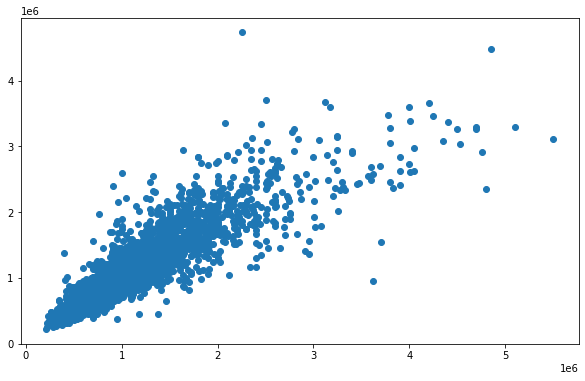

In [95]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predictions)

### Residual 

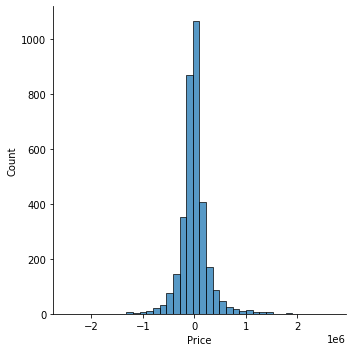

In [89]:
sns.displot(y_test - predictions,bins = 40) 